# Linear Regression 구현
- 아래 데이터를 이용하여 각 항목별 연관 관계를 분석하고 선형 회귀 분석 기법을 통해 상관 관계를 그래프로 표시하시오.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
        2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
        'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
        'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
                          1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
        'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,
                              5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
        'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,
                        1047,965,943,958,971,949,884,866,876,822,704,719]}
df = pd.DataFrame(data)
print(df.head())

# index_price: 물가지수
# interest_rate: 이자율
# unemployment_rate: 실업률

   year  month  interest_rate  unemployment_rate  index_price
0  2017     12           2.75                5.3         1464
1  2017     11           2.50                5.3         1394
2  2017     10           2.50                5.3         1357
3  2017      9           2.50                5.3         1293
4  2017      8           2.50                5.4         1256


# 선형 회귀: 이자율과 물가지수 상관 관계 분석
- 물가지수와 이자율 산점도 및 선형 회귀 분석

In [2]:
index_price = data.get('index_price')
print(index_price)

[1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719]


In [3]:
interest_rate = data.get('interest_rate')
print(interest_rate)

[2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2, 2, 2, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75]


In [4]:
print(max(index_price))
print(min(index_price))

1464
704


In [5]:
print(max(interest_rate))
print(min(interest_rate))

2.75
1.75


In [6]:
import numpy as np

# index_price = np.array(df['index_price'].to_list())
index_price = np.array([1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 1075, 1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719])

interest_rate = np.array([2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2, 2, 2, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75])

In [7]:
# 물가지수와 이자율
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
interest_rate, index_price, random_state=42)

# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

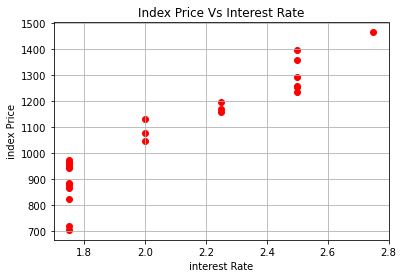

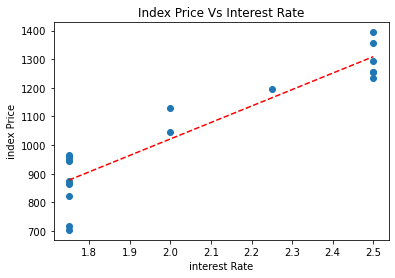

In [9]:
plt.title('Index Price Vs Interest Rate')
plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.grid()
plt.xlabel('interest Rate')
plt.ylabel('index Price')
plt.show()

plt.title('Index Price Vs Interest Rate')
plt.scatter(train_input, train_target, label='train set')
plt.plot([1.75, 2.5], [1.75*lr.coef_ + lr.intercept_, 2.5*lr.coef_ + lr.intercept_],
        color='red', linestyle='--')
plt.xlabel('interest Rate')
plt.ylabel('index Price')

plt.show()

In [10]:
print(lr.coef_, lr.intercept_)

[574.45637584] -127.38255033557084


In [11]:
print('train data score: ',
     lr.score(train_input, train_target))
print('test data score: ',
     lr.score(test_input, test_target))

train data score:  0.8541859618501457
test data score:  0.941892392945057


# 다항 회귀: 이자율과 물가지수 상관 관계 분석
- 다항 회귀

In [12]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [13]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_, lr.intercept_)

[-524.84946237 2802.42473118] -2429.1028225806517


0.8676269364555872
0.7945265214367343


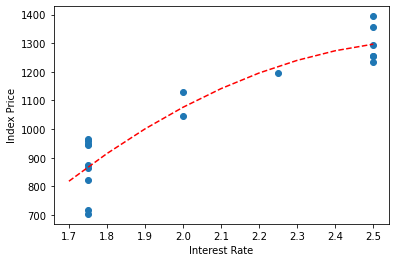

In [14]:
point = np.arange(1.7, 2.6, 0.1)
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')

# 방정식 그래프 그리기
plt.plot(point, -524.84946237*point**2 +2802.42473118*point -2429.1028225806517,
        color='red', linestyle='--')

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

In [15]:
print('이자율과 물가지수 다항 회귀')
print(f'다항 회귀 coef_: [{lr.coef_}], intercept: [{lr.intercept_}]')

print('다항 회귀 train data score:', lr.score(train_poly, train_target))
print('다항 회귀 test data score:', lr.score(test_poly, test_target))

이자율과 물가지수 다항 회귀
다항 회귀 coef_: [[-524.84946237 2802.42473118]], intercept: [-2429.1028225806517]
다항 회귀 train data score: 0.8676269364555872
다항 회귀 test data score: 0.7945265214367343


# 선형 회귀: 실업률과 물가지수 상관 관계 분석
- 실업률과 물가지수 산점도 및 선형 회귀 분석

In [16]:
np.array(df['unemployment_rate'])

array([5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9, 6. ,
       5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1])

In [17]:
unemployment_rate = np.array(df['unemployment_rate'])

In [18]:
# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
unemployment_rate, index_price, random_state=42)

In [19]:
# 훈련 세트와 테스트 세트를 2차원 배열로 변경
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [20]:
lr.fit(train_input, train_target)

LinearRegression()

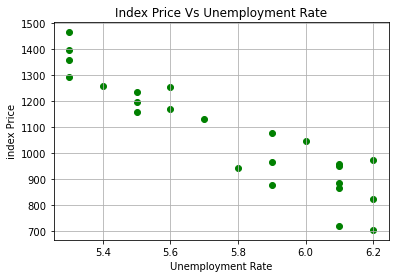

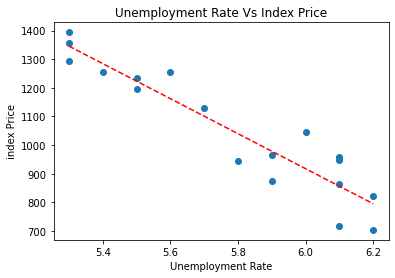

In [21]:
plt.title('Index Price Vs Unemployment Rate')
plt.scatter(df['unemployment_rate'], df['index_price'], color='green')
plt.grid()
plt.xlabel('Unemployment Rate')
plt.ylabel('index Price')
plt.show()

plt.title('Unemployment Rate Vs Index Price')
plt.scatter(train_input, train_target, label='train set')
plt.plot([5.3, 6.2], [5.3*lr.coef_ + lr.intercept_, 6.2*lr.coef_ + lr.intercept_],
        color='red', linestyle='--')
plt.xlabel('Unemployment Rate')
plt.ylabel('index Price')
plt.show()

In [22]:
print('Unemployment Rate vs. Index Price')
print(f'coef_: [{lr.coef_}], intercept: [{lr.intercept_}]')

print('train data score:', lr.score(train_input, train_target))
print('test data score:', lr.score(test_input, test_target))

Unemployment Rate vs. Index Price
coef_: [[-611.41330166]], intercept: [4586.05463182898]
train data score: 0.8748908875163574
test data score: 0.707475113377226


# 다항 회귀: 실업률과 물가지수 상관 관계 분석
- 다항 회귀

In [23]:
df.head()

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


In [24]:
train_poly = np.column_stack((train_input**2, train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [25]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.coef_, lr.intercept_)

[  -7.26428138 -527.97932022] 4347.248197109266


0.8748971920999006
0.7057073065929076


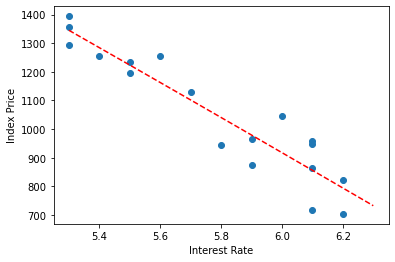

In [26]:
point = np.arange(5.3, 6.4, 0.2)
# 훈련 세트의 산점도 그리기
plt.scatter(train_input, train_target)
plt.xlabel('Interest Rate')
plt.ylabel('Index Price')

# 15에서 49까지 2차 방정식 그래프 그리기
plt.plot(point, -7.26428138*point**2 -527.97932022*point +4347.248197109266,
        color='red', linestyle='--')

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))